<a href="https://colab.research.google.com/github/bramha574/SDP/blob/main/softwaredefectpredicition_process_metrics_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np

#Reading the dataset
processmetrics = pd.read_csv("/content/READYTOMLPROCESSMETRICS.csv")

In [3]:
processmetrics

,Unnamed: 0,entity,age-months,n-authors,n-revs,BUG_STATUS
0,0,rl4j/rl4j-core/src/test/java/org/deeplearning4...,0,4,13,0.0
1,1,deeplearning4j/deeplearning4j-scaleout/spark/d...,0,5,19,0.0
2,2,deeplearning4j/deeplearning4j-nlp-parent/deepl...,0,7,19,1.0
3,3,deeplearning4j/deeplearning4j-core/src/test/ja...,0,7,27,1.0
4,4,datavec/datavec-spark/src/test/java/org/datave...,0,6,14,0.0
...,...,...,...,...,...,...
72148,72148,youtube_dl/extractor/jadorecettepub.py,60,1,1,0.0
72149,72149,youtube_dl/extractor/wayofthemaster.py,60,1,1,0.0
72150,72150,youtube_dl/extractor/theonion.py,60,1,1,0.0
72151,72151,youtube_dl/extractor/unistra.py,60,1,1,0.0


In [4]:
processmetrics.isnull().sum()

Unnamed: 0    0
entity        0
age-months    0
n-authors     0
n-revs        0
BUG_STATUS    0
dtype: int64

In [5]:
#Quick description of data
processmetrics.info()
processmetrics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72153 entries, 0 to 72152
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  72153 non-null  int64  
 1   entity      72153 non-null  object 
 2   age-months  72153 non-null  int64  
 3   n-authors   72153 non-null  int64  
 4   n-revs      72153 non-null  int64  
 5   BUG_STATUS  72153 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.3+ MB


,Unnamed: 0,age-months,n-authors,n-revs,BUG_STATUS
count,72153.000000,72153.000000,72153.000000,72153.000000,72153.000000
mean,36076.000000,22.894821,3.325198,8.548931,0.280058
std,20828.921323,17.829621,3.235353,13.652957,0.449030
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,18038.000000,6.000000,1.000000,2.000000,0.000000
50%,36076.000000,21.000000,2.000000,5.000000,0.000000
75%,54114.000000,35.000000,4.000000,10.000000,1.000000
max,72152.000000,61.000000,127.000000,932.000000,1.000000


In [6]:
#Removing the un necessary columns
processmetrics.drop(['Unnamed: 0'], inplace=True, axis=1)

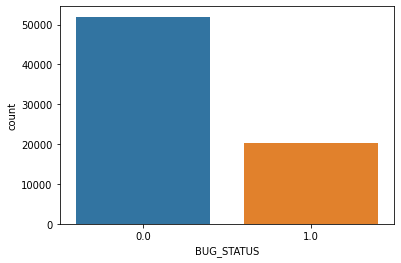

In [7]:

import seaborn as sns
sns.countplot(x='BUG_STATUS', data=processmetrics)

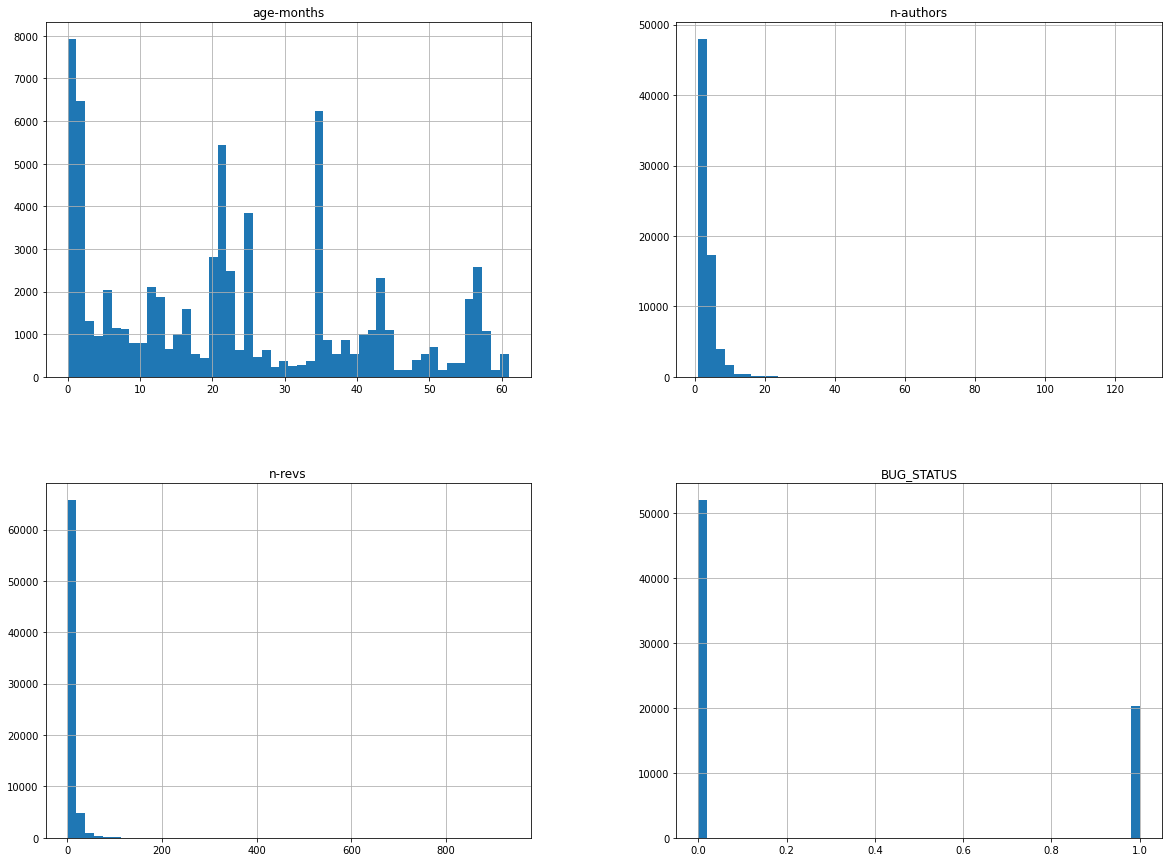

In [8]:
import matplotlib.pyplot as plt
processmetrics.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
# #train and test set splitting
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(processmetrics,test_size=0.2,random_state=42)

In [10]:
x = len(train_set)
y = len(test_set)
print(train_set.shape)
print(test_set.shape)

(57722, 5)
(14431, 5)


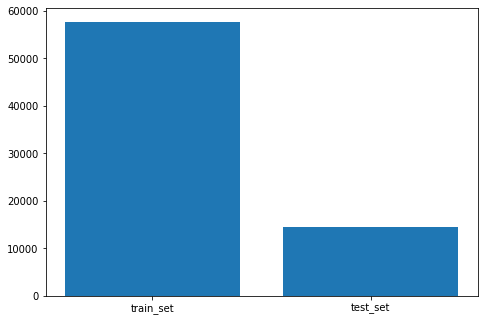

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
set_ = ['train_set','test_set']
length =  [x,y]
ax.bar(set_,length)
plt.show()

In [12]:
processmetrics = train_set.copy()

In [13]:
#checking correlation
corr_matrix = processmetrics.corr()
corr_matrix["BUG_STATUS"].sort_values(ascending=False)

BUG_STATUS    1.000000
n-authors     0.113700
n-revs        0.089009
age-months   -0.239859
Name: BUG_STATUS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b2989cd90>,
      dtype=object)

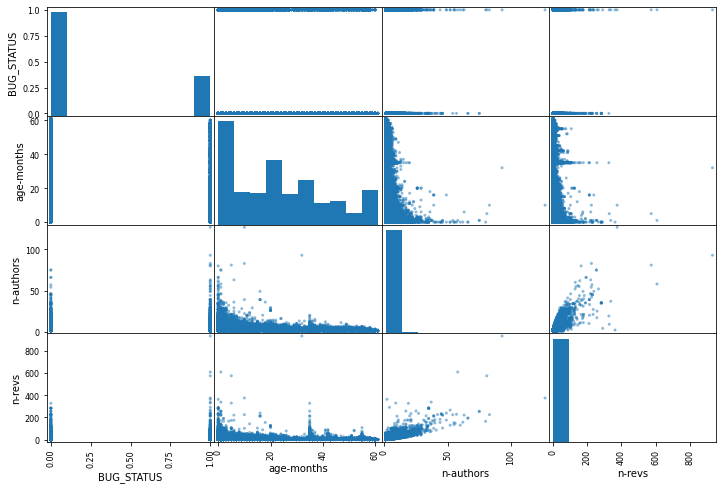

In [14]:
#checking correlation with scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["BUG_STATUS","age-months","n-authors","n-revs"]
scatter_matrix(processmetrics[attributes],figsize=(12,8))

In [15]:
X_train = train_set.drop("BUG_STATUS",axis=1)
y_train = train_set['BUG_STATUS'].copy()

X_test = test_set.drop("BUG_STATUS",axis=1)
y_test = test_set['BUG_STATUS'].copy()

In [16]:
X_train = X_train.drop("entity",axis=1)
X_test = X_test.drop("entity",axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.67787854,  0.20796609,  1.19458646],
       [ 0.67787854,  0.20796609, -0.18749469],
       [-1.22756762, -0.41207052, -0.40571802],
       ...,
       [ 1.07017628, -0.41207052, -0.40571802],
       [-1.22756762,  0.5179844 ,  0.53991644],
       [ 1.57455908, -0.72208883, -0.04201246]])

In [19]:
y_train

9626     0.0
9020     0.0
39079    1.0
71362    0.0
46643    0.0
        ... 
37194    0.0
6265     0.0
54886    0.0
860      0.0
15795    0.0
Name: BUG_STATUS, Length: 57722, dtype: float64

In [20]:
X_test

array([[ 0.67787854, -0.10205221,  0.68539867],
       [-1.11548255, -0.10205221, -0.33297691],
       [-0.89131241, -0.72208883, -0.40571802],
       ...,
       [-1.00339748, -0.10205221, -0.33297691],
       [ 0.1174532 , -0.72208883, -0.55120025],
       [-0.72318481,  0.20796609, -0.2602358 ]])

In [21]:
y_test

11562    0.0
57351    0.0
22818    1.0
35957    1.0
56037    0.0
        ... 
67097    0.0
2077     0.0
28598    0.0
67909    0.0
33280    1.0
Name: BUG_STATUS, Length: 14431, dtype: float64

In [23]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# Classifiers:
# Logistic Regression
# Decision Tree
# Support Vector Machine

# Linear Discriminant Analysis
# Quadratic Discriminant Analysis
# Random Forest
# K-Nearest Neighbors
# Naive Bayes

# Scoring:
# precision score
# recall score
# F1 score
# support score
# accuracy score
# AUC/ROC

In [ ]:
# Decision Tree
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# create model
model = DecisionTreeClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR DECISION TREE CLASSIFIER")

params = { 
    "random_state":range(30,40)} 
gs_Deci = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_Deci.fit(X_train, y_train)

print("Best Parameters")
print(gs_Deci.best_params_)

print("Best estimaters")
print(gs_Deci.best_estimator_)

#Predicting Bugs
y_pred = gs_Deci.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

RF_confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


RF_confusion.ax_.set_title("Confusion Matrix using Decision tree Classfier")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
# Logistic regression
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = LogisticRegression()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Logistic Regression")

params = { 
    "random_state":range(30,40)} 
gs_logi = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_logi.fit(X_train, y_train)

print("Best Parameters")
print(gs_logi.best_params_)

print("Best estimaters")
print(gs_logi.best_estimator_)

#Predicting Bugs
y_pred = gs_logi.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Logistic Regression")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
# Support Vector Machine
from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = SVC(gamma='auto')

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR SVM")

params = { 
    "random_state":range(30,40)} 
gs_svm = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_svm.fit(X_train, y_train)

print("Best Parameters")
print(gs_svm.best_params_)

print("Best estimaters")
print(gs_svm.best_estimator_)

#Predicting Bugs
y_pred = gs_svm.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_svm.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Support Vector Machine")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.756 (0.003)
GRID SEARCH FOR SVM


In [ ]:
#Random Forest
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = RandomForestRegressor()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Random Forest")

params = { 
    "random_state":range(30,40)} 
gs_logi = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_logi.fit(X_train, y_train)

print("Best Parameters")
print(gs_logi.best_params_)

print("Best estimaters")
print(gs_logi.best_estimator_)

#Predicting Bugs
y_pred = gs_logi.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Random Forest")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
#Naive Bayes
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = GaussianNB()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Random Forest")

params = { 
    "random_state":range(30,40)} 
gs_nb = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_nb.fit(X_train, y_train)

print("Best Parameters")
print(gs_nb.best_params_)

print("Best estimaters")
print(gs_nb.best_estimator_)

#Predicting Bugs
y_pred = gs_nb.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_nb.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Naive Bayes")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
# Multilayer perceptron
from numpy import mean
from numpy import std
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = MLPClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Multilayer perceptron")

params = { 
    "random_state":range(30,40)} 
gs_mlp = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_mlp.fit(X_train, y_train)

print("Best Parameters")
print(gs_mlp.best_params_)

print("Best estimaters")
print(gs_mlp.best_estimator_)

#Predicting Bugs
y_pred = gs_mlp.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_mlp.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Multilayer perceptron")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.767 (0.004)
GRID SEARCH FOR Multilayer perceptron


In [ ]:
#KNN
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics


k = 4  

# create model
model = KNeighborsClassifier(n_neighbors = k)

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================

model.fit(X_train, y_train)

#Predicting Bugs
y_pred = model.predict(X_test)

print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))


Cross validation Accuracy:
Accuracy: 0.756 (0.006)
GRID SEARCH FOR AdaBoost
Best Parameters
{'random_state': 30}
Best estimaters
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=30)
CONFUSION MATRIX
[[9591  757]
 [2794 1289]]
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84     10348
         1.0       0.63      0.32      0.42      4083

    accuracy                           0.75     14431
   macro avg       0.70      0.62      0.63     14431
weighted avg       0.73      0.75      0.72     14431

Accuracy: 0.7539325064098122
Precision: 0.6300097751710655
Recall: 0.3156992407543473
F1 Score: 0.4206232664382444
Mean Absolute Error: 0.24606749359018779
Cohens kappa: 0.2856912819985703
ROC AUC: 0.6212725040261879


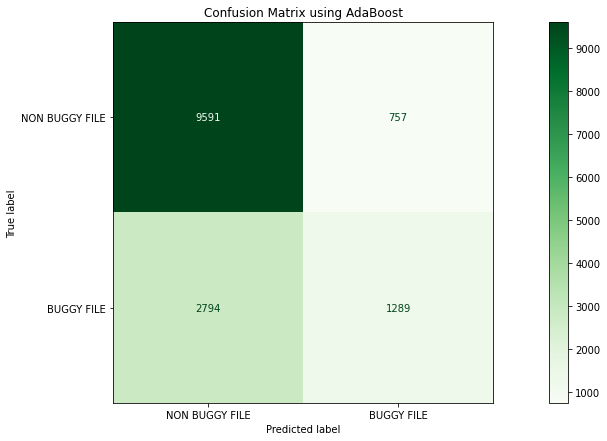

In [ ]:
#AdaBoost
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = AdaBoostClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR AdaBoost")

params = { 
    "random_state":range(30,40)} 
gs_ada = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_ada.fit(X_train, y_train)

print("Best Parameters")
print(gs_ada.best_params_)

print("Best estimaters")
print(gs_ada.best_estimator_)

#Predicting Bugs
y_pred = gs_ada.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_ada.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using AdaBoost")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
#Quadratic Discriminant Analysis
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = QuadraticDiscriminantAnalysis()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR AdaBoost")

params = { 
    "random_state":range(30,40)} 
gs_qda = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_qda.fit(X_train, y_train)

print("Best Parameters")
print(gs_qda.best_params_)

print("Best estimaters")
print(gs_qda.best_estimator_)

#Predicting Bugs
y_pred = gs_qda.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_qda.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Quadratic Discriminant Analysis")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")